# Eexploratory data analysis

### load data file

In [2]:
# import packages 

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
## read the data file 

wheather_data = pd.read_csv('daily_weather.csv')

In [4]:
# show the head of the data sframe 

wheather_data.head()

,number,air_pressure_9am,air_temp_9am,avg_wind_direction_9am,avg_wind_speed_9am,max_wind_direction_9am,max_wind_speed_9am,rain_accumulation_9am,rain_duration_9am,relative_humidity_9am,relative_humidity_3pm
0,0,918.060000,74.822000,271.100000,2.080354,295.400000,2.863283,0.0,0.0,42.420000,36.160000
1,1,917.347688,71.403843,101.935179,2.443009,140.471548,3.533324,0.0,0.0,24.328697,19.426597
2,2,923.040000,60.638000,51.000000,17.067852,63.700000,22.100967,0.0,20.0,8.900000,14.460000
3,3,920.502751,70.138895,198.832133,4.337363,211.203341,5.190045,0.0,0.0,12.189102,12.742547
4,4,921.160000,44.294000,277.800000,1.856660,136.500000,2.863283,8.9,14730.0,92.410000,76.740000


### explore our data shape and column names

In [4]:
wheather_data.shape
 

(1587257, 13)

In [5]:
wheather_data.columns

Index([u'rowID', u'hpwren_timestamp', u'air_pressure', u'air_temp',
       u'avg_wind_direction', u'avg_wind_speed', u'max_wind_direction',
       u'max_wind_speed', u'min_wind_direction', u'min_wind_speed',
       u'rain_accumulation', u'rain_duration', u'relative_humidity'],
      dtype='object')

### many of the data variables are continous , so i will do some  feature engineering on them 

In [6]:
## first drop all NAN values 
wheather_data =  wheather_data.dropna(axis=0)


In [7]:
## compare the number of observation before and after drop NAN
print 'the shape after droping NAN values ' ,wheather_data.shape
print 'droped observations =',1587257 -wheather_data.shape[0] 

the shape after droping NAN values  (1586823, 13)
droped observations = 434


In [8]:
## Now i will pinn some variables 
## relative_humidity is the percentage i will use it the describe the humidity low , high and meduim ,
## i will do that by this function 

def category_relative_humidity(x):
    if int(x) in range(0,41) :
        return 'low_hum'
    elif int(x) in range(41,61):
        return 'meduim_hum'
    elif int(x) in range(61,100) :
        return 'high_hum'
    
## apply changes to the data frame    
wheather_data['category_relative_humidity'] =  wheather_data['relative_humidity'].apply(category_relative_humidity)

In [9]:
## the second variable is wind_direction , 
## it is the angle of the wind direction starts from 0 at the north and increase clockwise
def category_wind_direction(degree):    
    if int(degree) in range(0,11) or  int(degree) in range(348,360):
        return 'N'
    elif int(degree) in range(11 , 33 ) :
        return 'NNE'
    elif int(degree) in range(33  , 56 ) :
        return 'NE'
    elif int(degree) in range(56 , 78):
        return 'ENE'
    elif int(degree) in range(78 , 101):
        return 'E'
    elif int(degree) in range(101  , 123):
        return 'ESE'
    elif int(degree) in range(123 , 146):
        return 'SE'
    elif int(degree) in range(146 , 168):
        return 'SSE'
    elif int(degree) in range(168 , 191):
        return 'S'
    elif int(degree) in range(191 , 213):
        return 'SSW'
    elif int(degree) in range(213 , 236):
        return 'SW'
    elif int(degree) in range(236 , 258):
        return 'WSW'
    elif int(degree) in range(258 , 281):
        return 'W'
    elif int(degree) in range(281 , 303):
        return 'WNW'
    elif int(degree) in range(303 , 326):
        return 'NW'
    elif int(degree) in range(326 , 348):
        return 'NNW'

In [10]:
## apply the function to our data frame 
wheather_data['max_wind_direction_cate']=wheather_data['max_wind_direction'].apply(category_wind_direction)


In [11]:
## apply the same function to min_wind_direction
wheather_data['min_wind_direction_cate']=wheather_data['min_wind_direction'].apply(category_wind_direction)

#### i have so many feature engineering to do , but now for this assignment  i will stop here 
#### now let's see the frequency of transformed variables 

In [12]:
## value counts for relative_humidity
wheather_data['category_relative_humidity'].value_counts()

low_hum       731422
high_hum      491359
meduim_hum    364042
Name: category_relative_humidity, dtype: int64

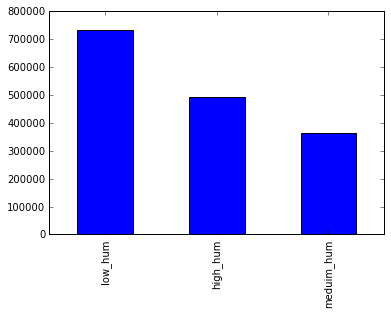

In [13]:
## let's see it on plotting 
wheather_data['category_relative_humidity'].value_counts().plot(kind='bar')

In [14]:
### as you see the low humidity has the most frequency 

In [15]:
## let's show the wind direction min and max directions 

In [16]:
wheather_data['max_wind_direction_cate'].value_counts()

SW     250737
S      226494
SSW    218597
ENE    171027
NE     155277
NNE     98812
WSW     79164
N       68056
E       67585
ESE     44485
WNW     42737
NNW     41079
W       41062
NW      39246
SSE     21584
SE      20881
Name: max_wind_direction_cate, dtype: int64

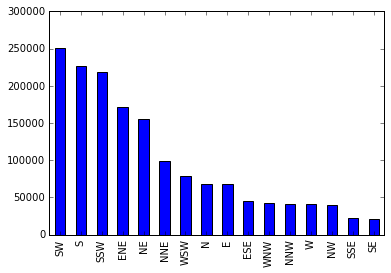

In [17]:
wheather_data['max_wind_direction_cate'].value_counts().plot(kind='bar')

In [18]:
wheather_data['min_wind_direction_cate'].value_counts()

S      275320
SSW    268426
NE     133243
NNE    130892
SSE    124882
N      123706
SW      77431
NNW     73919
ENE     68639
NW      50307
E       47019
WNW     46496
W       44302
SE      44043
ESE     39694
WSW     38504
Name: min_wind_direction_cate, dtype: int64

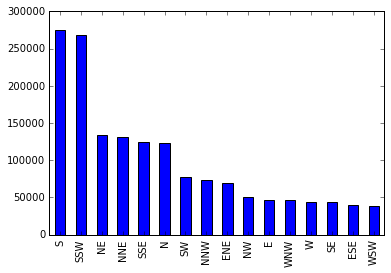

In [19]:
wheather_data['min_wind_direction_cate'].value_counts().plot(kind='bar')

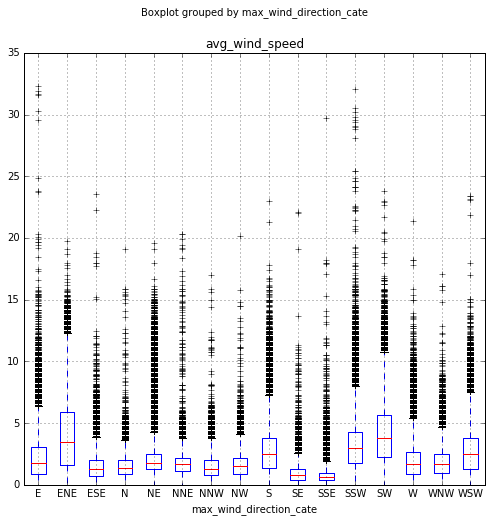

In [20]:
## the min and max direction little different from each other in frequency 
wheather_data.boxplot(column="avg_wind_speed",        # Column to plot
                 by= "max_wind_direction_cate",         # Column to split upon
                 figsize= (8,8))   

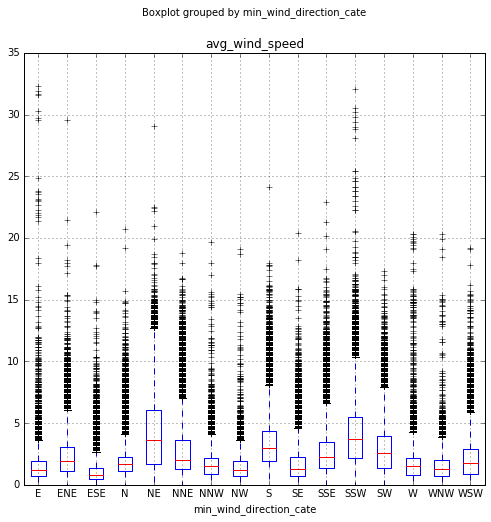

In [21]:
## d min direction little different from each other in frequency 
wheather_data.boxplot(column="avg_wind_speed",        # Column to plot
                 by= "min_wind_direction_cate",         # Column to split upon
                 figsize= (8,8)) 
    

In [22]:
## as we see the SSW direction has the highst speed in the min and max directions

In [23]:
## the mean value is around 30